# 07_TransferLearningFineTuning_ResNet50V1

Written by: Rupesh Kumar Dey


Notebook used for model development and testing for Transfer Learning Models with Fine Tuning (ResNet50V1)

## Importing required Libraries

In [1]:
!pip install seaborn
!pip install tensorflow_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 28.4 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 KB 16.1 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
# Importing python Libraries
# General / plotting libraries
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Image Libraries
from PIL import Image

# File System Libraries
import os
import sys
import copy
from copy import deepcopy

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, metrics, callbacks
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from HelperFunctions import *

In [3]:
# Setting project parent directory path 
projectPath = "/notebooks"

## Model Development - Transfer Learning Fine Tuning (ResNet50V1)
Models Developed and Tested
1. ResNet50V1


### 07_TransferLearningFineTuning_ResNet50V1_NORMAL: Transfer Learning with ResNet50V1 model on NORMAL Image

#### Dataset Loading 

In [4]:
# Defining path of dataset
train_path = "/Dataset/Dataset_NORMAL/train"
test_path = "/Dataset/Dataset_NORMAL/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [5]:
# Create Res Net 50 V1 and train
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_NORMAL = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
TransferLearningFineTuning_ResNet50V1_NORMAL.summary()
checkpointPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_NORMAL/checkpoint/07_TransferLearningFineTuning_ResNet50V1_NORMAL.ckpt"
TransferLearningFineTuning_ResNet50V1_NORMAL_history = trainModel(TransferLearningFineTuning_ResNet50V1_NORMAL, train_data, valid_data, checkpointPath ,epochs = 50)

2022-08-26 23:08:34.677834: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 23:08:34.733871: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 23:08:34.734375: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 23:08:34.736234: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 23:08:34.736639: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

102981632/102967424 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                            

2022-08-26 23:08:50.711071: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


131/131 [==============================] - ETA: 0s - loss: 0.3686 - accuracy: 0.8630 - recall: 0.8330
Epoch 00001: val_accuracy improved from -inf to 0.25347, saving model to TrainedResults/07_TransferLearningFineTuning_ResNet50V1_NORMAL/checkpoint/07_TransferLearningFineTuning_ResNet50V1_NORMAL.ckpt
131/131 [==============================] - 72s 461ms/step - loss: 0.3686 - accuracy: 0.8630 - recall: 0.8330 - val_loss: 1.4364 - val_accuracy: 0.2535 - val_recall: 0.0000e+00
Epoch 2/50
131/131 [==============================] - ETA: 0s - loss: 0.1817 - accuracy: 0.9381 - recall: 0.9316
Epoch 00002: val_accuracy did not improve from 0.25347
131/131 [==============================] - 36s 273ms/step - loss: 0.1817 - accuracy: 0.9381 - recall: 0.9316 - val_loss: 1.4403 - val_accuracy: 0.2517 - val_recall: 0.1562
Epoch 3/50
131/131 [==============================] - ETA: 0s - loss: 0.1425 - accuracy: 0.9556 - recall: 0.9511
Epoch 00003: val_accuracy improved from 0.25347 to 0.37500, saving mo

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 9s 13ms/step
Confusion Matrix:


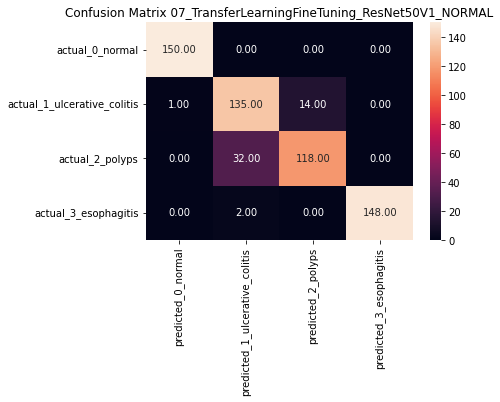

In [6]:
# Load best model from checkpoint folder and generate results
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_NORMAL = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_NORMAL/checkpoint/07_TransferLearningFineTuning_ResNet50V1_NORMAL.ckpt"
loadModel(TransferLearningFineTuning_ResNet50V1_NORMAL,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_ResNet50V1_NORMAL, test_data, "07_TransferLearningFineTuning_ResNet50V1_NORMAL" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_NORMAL/results/confusionMatrix/07_TransferLearningFineTuning_ResNet50V1_NORMAL.jpg")

2022-08-26 23:40:44.516911: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://7e4b5e07-3d06-456b-a654-d7da32e642a3/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


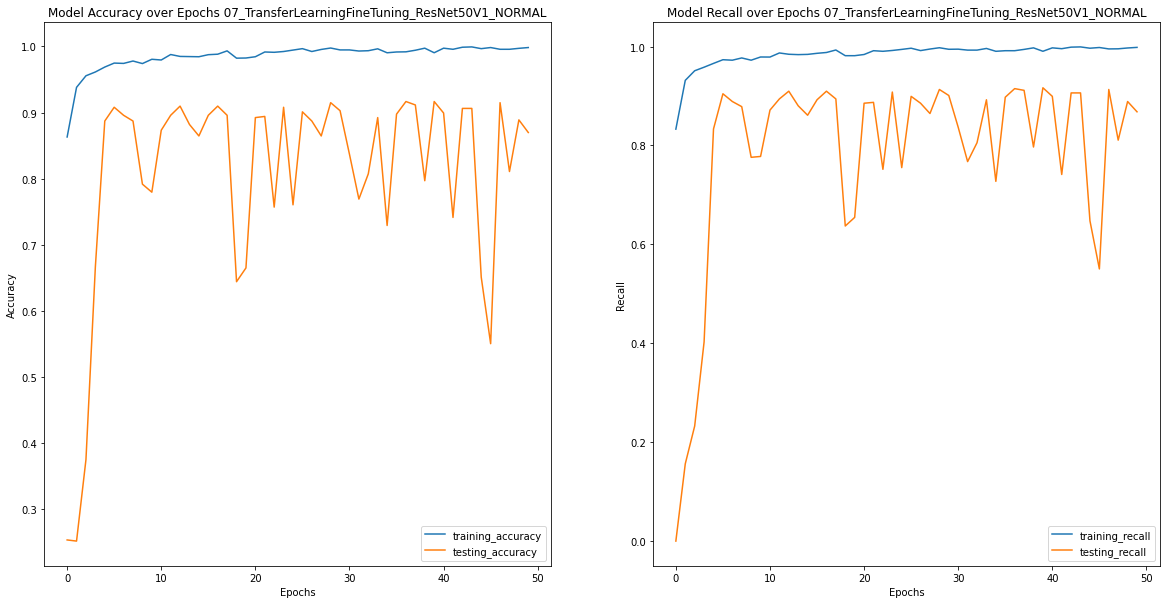

In [7]:
# Save results, training curve and plot training curve
saveResults_csv(df_results,"TrainedResults/07_TransferLearningFineTuning_ResNet50V1_NORMAL/results/classificationReport/07_TransferLearningFineTuning_ResNet50V1_NORMAL.csv")
historyPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_NORMAL/history/07_TransferLearningFineTuning_ResNet50V1_NORMAL.npy"
save_history1(TransferLearningFineTuning_ResNet50V1_NORMAL_history, historyPath)
history = load_history(historyPath)
plot_history(history, "07_TransferLearningFineTuning_ResNet50V1_NORMAL", location = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_NORMAL/history/07_TransferLearningFineTuning_ResNet50V1_NORMAL.jpg")

### 07_TransferLearningFineTuning_ResNet50V1_CLAHE: Transfer Learning with ResNet50V1 model on CLAHE Image

#### Dataset Loading 

In [8]:
# Defining path of dataset
train_path = "/Dataset/Dataset_CLAHE/train"
test_path = "/Dataset/Dataset_CLAHE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [9]:
# Create Res Net 50 V1 and train
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_CLAHE = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
TransferLearningFineTuning_ResNet50V1_CLAHE.summary()
checkpointPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE/checkpoint/07_TransferLearningFineTuning_ResNet50V1_CLAHE.ckpt"
TransferLearningFineTuning_ResNet50V1_CLAHE_history = trainModel(TransferLearningFineTuning_ResNet50V1_CLAHE, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 batch_normalization_6 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 batch_normalization_7 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 20)                2002

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 8s 12ms/step
Confusion Matrix:


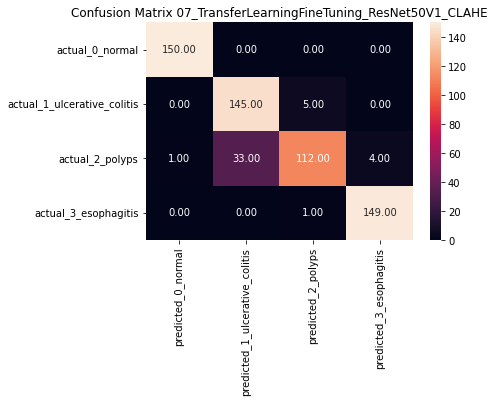

In [10]:
# Load best model from checkpoint folder and generate results
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_CLAHE = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE/checkpoint/07_TransferLearningFineTuning_ResNet50V1_CLAHE.ckpt"
loadModel(TransferLearningFineTuning_ResNet50V1_CLAHE,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_ResNet50V1_CLAHE, test_data, "07_TransferLearningFineTuning_ResNet50V1_CLAHE" ,
                                                                data_class = ["0_normal_CLAHE",
                                                                              "1_ulcerative_colitis_CLAHE",
                                                                              "2_polyps_CLAHE",
                                                                              "3_esophagitis_CLAHE"],
                                                                location = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE/results/confusionMatrix/07_TransferLearningFineTuning_ResNet50V1_CLAHE.jpg")

INFO:tensorflow:Assets written to: ram://d2819467-1793-41ae-84df-298832f8c5d4/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


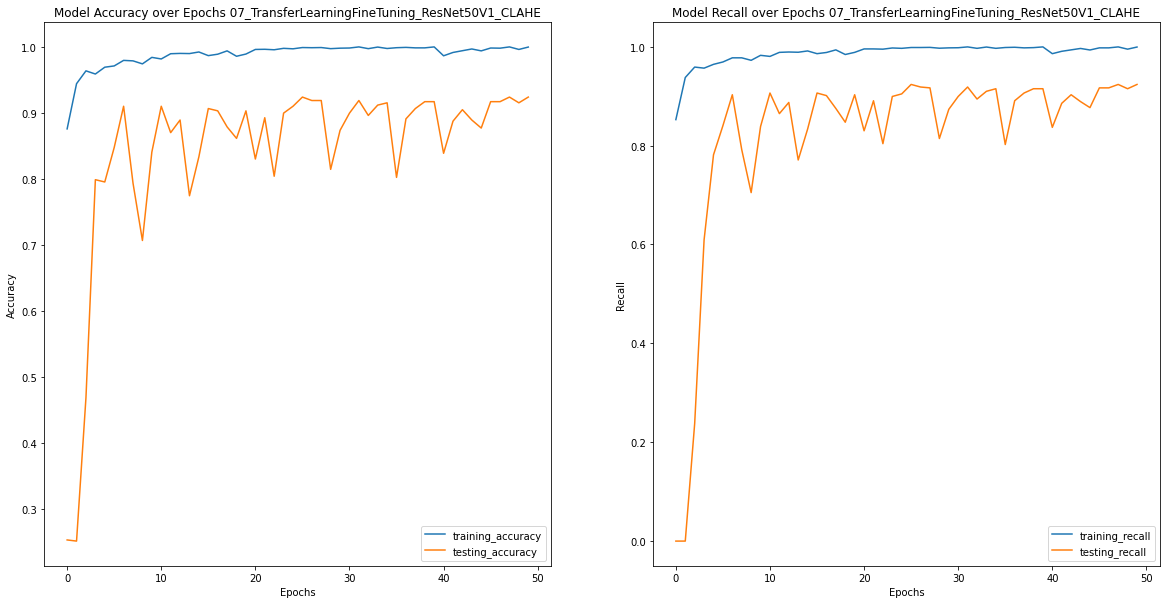

In [11]:
# Save results, save training curve and plot training curve.
saveResults_csv(df_results,"TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE/results/classificationReport/07_TransferLearningFineTuning_ResNet50V1_CLAHE.csv")
historyPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE/history/07_TransferLearningFineTuning_ResNet50V1_CLAHE.npy"
save_history1(TransferLearningFineTuning_ResNet50V1_CLAHE_history, historyPath)
history = load_history(historyPath)
plot_history(history, "07_TransferLearningFineTuning_ResNet50V1_CLAHE", location = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE/history/07_TransferLearningFineTuning_ResNet50V1_CLAHE.jpg")

### 07_TransferLearningFineTuning_ResNet50V1_MULTISCALE: Transfer Learning with ResNet50V1 model on MULTISCALE Image

#### Dataset Loading 

In [12]:
# Defining path of dataset
train_path = "/Dataset/Dataset_MULTISCALE/train"
test_path = "/Dataset/Dataset_MULTISCALE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [13]:
# Create Res Net 50 V1 and train
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_MULTISCALE = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
TransferLearningFineTuning_ResNet50V1_MULTISCALE.summary()
checkpointPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_MULTISCALE/checkpoint/07_TransferLearningFineTuning_ResNet50V1_MULTISCALE.ckpt"
TransferLearningFineTuning_ResNet50V1_MULTISCALE_history = trainModel(TransferLearningFineTuning_ResNet50V1_MULTISCALE, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 batch_normalization_12 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 1000)              1001000   
                                                                 
 batch_normalization_13 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 20)                2002

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 9s 13ms/step
Confusion Matrix:


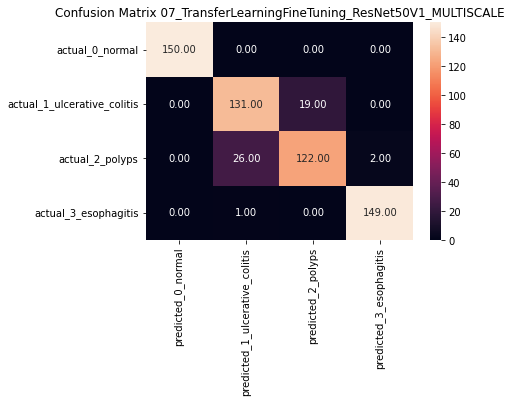

In [14]:
# Load best model from checkpoint folder and generate results
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_MULTISCALE = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_MULTISCALE/checkpoint/07_TransferLearningFineTuning_ResNet50V1_MULTISCALE.ckpt"
loadModel(TransferLearningFineTuning_ResNet50V1_MULTISCALE,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_ResNet50V1_MULTISCALE, test_data, "07_TransferLearningFineTuning_ResNet50V1_MULTISCALE" ,
                                                                data_class = ["0_normal_MULTISCALE",
                                                                              "1_ulcerative_colitis_MULTISCALE",
                                                                              "2_polyps_MULTISCALE",
                                                                              "3_esophagitis_MULTISCALE"],
                                                                location = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_MULTISCALE/results/confusionMatrix/07_TransferLearningFineTuning_ResNet50V1_MULTISCALE.jpg")

INFO:tensorflow:Assets written to: ram://99e85ac4-4a51-444b-98d6-b5ddfbf03570/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


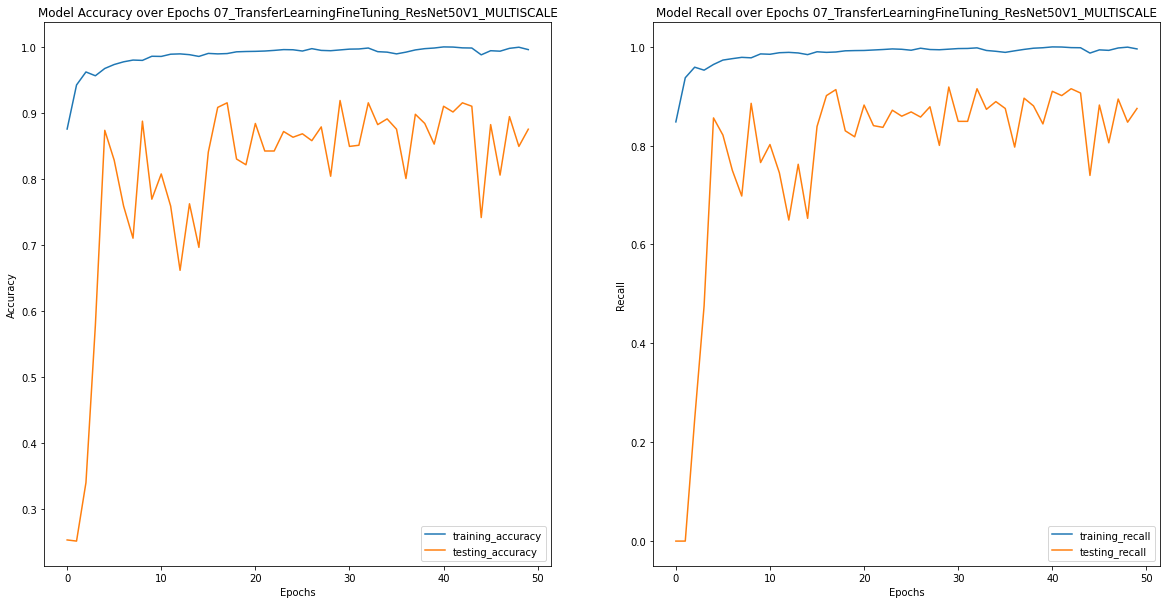

In [15]:
# Save results, save training curve and plot training curve. 
saveResults_csv(df_results,"TrainedResults/07_TransferLearningFineTuning_ResNet50V1_MULTISCALE/results/classificationReport/07_TransferLearningFineTuning_ResNet50V1_MULTISCALE.csv")
historyPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_MULTISCALE/history/07_TransferLearningFineTuning_ResNet50V1_MULTISCALE.npy"
save_history1(TransferLearningFineTuning_ResNet50V1_MULTISCALE_history, historyPath)
history = history = load_history(historyPath)
plot_history(history, "07_TransferLearningFineTuning_ResNet50V1_MULTISCALE", location = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_MULTISCALE/history/07_TransferLearningFineTuning_ResNet50V1_MULTISCALE.jpg")

### 07_TransferLearningFineTuning_ResNet50V1_RAYLEIGH: Transfer Learning with ResNet50V1 model on RAYLEIGH Image

#### Dataset Loading 

In [16]:
# Defining path of dataset
train_path = "/Dataset/Dataset_RAYLEIGH/train"
test_path = "/Dataset/Dataset_RAYLEIGH/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [17]:
# Create Res Net 50 V1 and train
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_RAYLEIGH = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
TransferLearningFineTuning_ResNet50V1_RAYLEIGH.summary()
checkpointPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_RAYLEIGH/checkpoint/07_TransferLearningFineTuning_ResNet50V1_RAYLEIGH.ckpt"
TransferLearningFineTuning_ResNet50V1_RAYLEIGH_history = trainModel(TransferLearningFineTuning_ResNet50V1_RAYLEIGH, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 batch_normalization_18 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 1000)              1001000   
                                                                 
 batch_normalization_19 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 20)                2002

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 8s 12ms/step
Confusion Matrix:


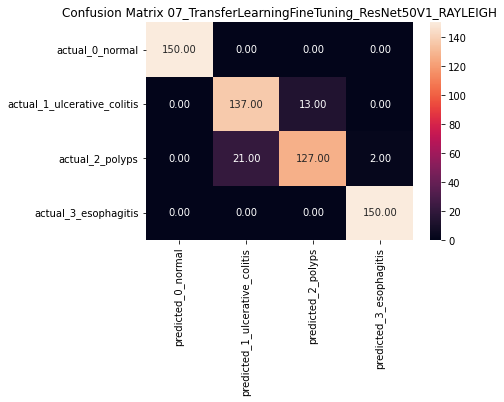

In [18]:
# Load best model from checkpoint folder and generate results
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_RAYLEIGH = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_RAYLEIGH/checkpoint/07_TransferLearningFineTuning_ResNet50V1_RAYLEIGH.ckpt"
loadModel(TransferLearningFineTuning_ResNet50V1_RAYLEIGH,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_ResNet50V1_RAYLEIGH, test_data, "07_TransferLearningFineTuning_ResNet50V1_RAYLEIGH" ,
                                                                data_class = ["0_normal_RAYLEIGH",
                                                                              "1_ulcerative_colitis_RAYLEIGH",
                                                                              "2_polyps_RAYLEIGH",
                                                                              "3_esophagitis_RAYLEIGH"],
                                                                location = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_RAYLEIGH/results/confusionMatrix/07_TransferLearningFineTuning_ResNet50V1_RAYLEIGH.jpg")

INFO:tensorflow:Assets written to: ram://1da47764-bf27-4dcd-8bad-6d8569fa2037/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


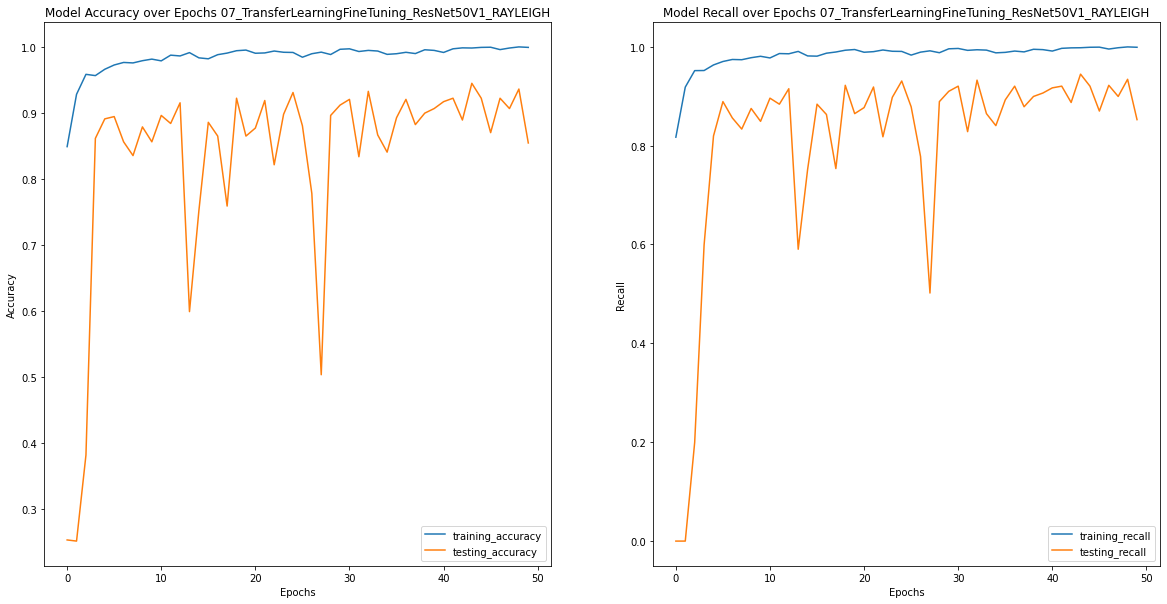

In [19]:
# Save results, plot tarining curvea and plot training curve. 
saveResults_csv(df_results,"TrainedResults/07_TransferLearningFineTuning_ResNet50V1_RAYLEIGH/results/classificationReport/07_TransferLearningFineTuning_ResNet50V1_RAYLEIGH.csv")
historyPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_RAYLEIGH/history/07_TransferLearningFineTuning_ResNet50V1_RAYLEIGH.npy"
save_history1(TransferLearningFineTuning_ResNet50V1_RAYLEIGH_history, historyPath)
history = load_history(historyPath)
plot_history(history, "07_TransferLearningFineTuning_ResNet50V1_RAYLEIGH", location = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_RAYLEIGH/history/07_TransferLearningFineTuning_ResNet50V1_RAYLEIGH.jpg")

### 07_TransferLearningFineTuning_ResNet50V1_CLAHE: Transfer Learning with ResNet50V1 model on CLAHE Image (Optimizer - Adam)

#### Dataset Loading

In [20]:
# Defining path of dataset
train_path = "/Dataset/Dataset_CLAHE/train"
test_path = "/Dataset/Dataset_CLAHE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [21]:
# Create Res Net 50 V1 and train
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam.summary()
checkpointPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam/checkpoint/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam.ckpt"
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam_history = trainModel(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 batch_normalization_24 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 1000)              1001000   
                                                                 
 batch_normalization_25 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 20)                2002

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 11s 12ms/step
Confusion Matrix:


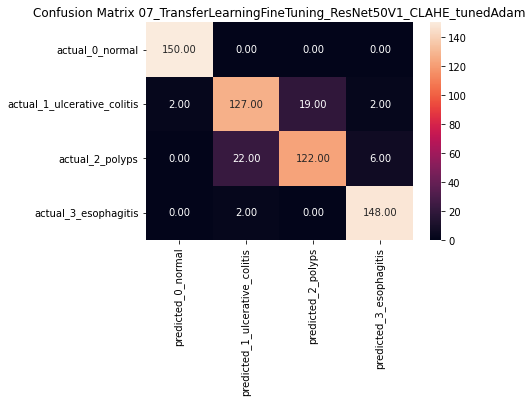

In [22]:
# Load best model from checkpoint folder and geneerate results
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam/checkpoint/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam.ckpt"
loadModel(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam, test_data, "07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam" ,
                                                                data_class = ["0_normal_CLAHE",
                                                                              "1_ulcerative_colitis_CLAHE",
                                                                              "2_polyps_CLAHE",
                                                                              "3_esophagitis_CLAHE"],
                                                                location = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam/results/confusionMatrix/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam.jpg")

INFO:tensorflow:Assets written to: ram://7cd86d33-7dd8-4e29-8876-5f03c4f276b0/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


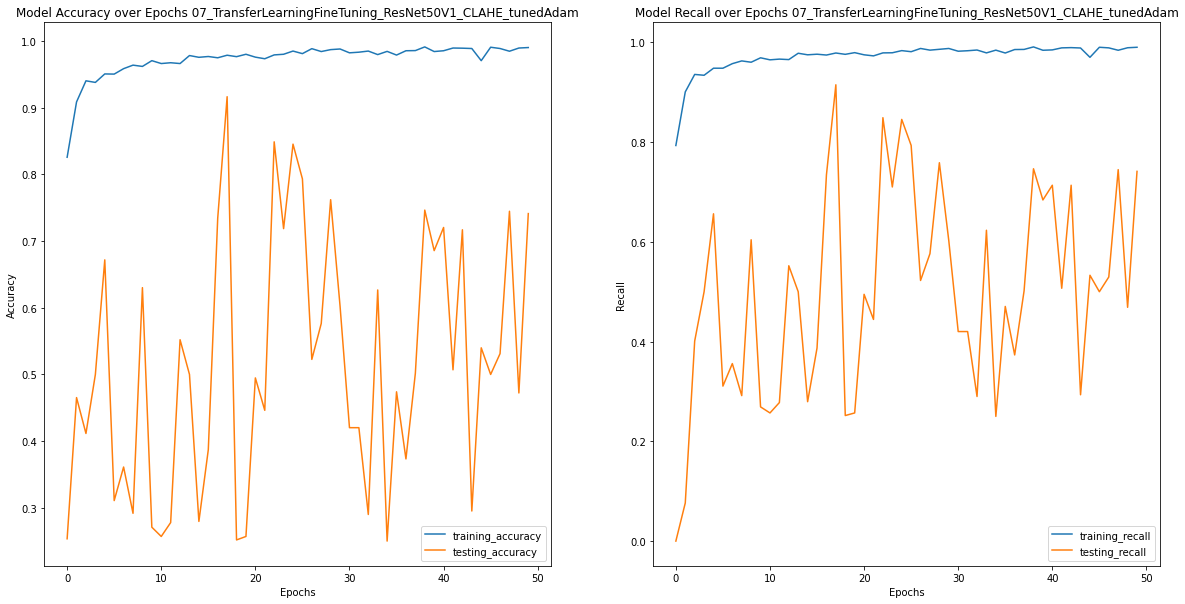

In [23]:
# Save results, save training curve and plot results. 
saveResults_csv(df_results,"TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam/results/classificationReport/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam.csv")
historyPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam/history/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam.npy"
save_history1(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam_history, historyPath)
history = load_history(historyPath)
plot_history(history, "07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam", location = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam/history/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdam.jpg")

### 07_TransferLearningFineTuning_ResNet50V1_CLAHE: Transfer Learning with ResNet50V1 model on CLAHE Image (Optimizer - LrScheduler)

#### Dataset Loading

In [24]:
# Defining path of dataset
train_path = "/Dataset/Dataset_CLAHE/train"
test_path = "/Dataset/Dataset_CLAHE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [25]:
# Create Res Net 50 V1 and train
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler.summary()
checkpointPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler/checkpoint/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler.ckpt"
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler_history = trainModelLrScheduler(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 batch_normalization_30 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            (None, 1000)              1001000   
                                                                 
 batch_normalization_31 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_21 (Dense)            (None, 20)                200

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 8s 12ms/step
Confusion Matrix:


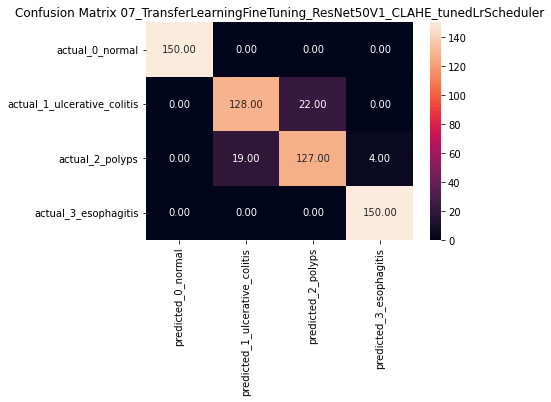

In [26]:
# Load best model from checkpoint folder and generate results.
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler/checkpoint/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler.ckpt"
loadModel(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler, test_data, "07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler" ,
                                                                data_class = ["0_normal_CLAHE",
                                                                              "1_ulcerative_colitis_CLAHE",
                                                                              "2_polyps_CLAHE",
                                                                              "3_esophagitis_CLAHE"],
                                                                location = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler/results/confusionMatrix/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler.jpg")


INFO:tensorflow:Assets written to: ram://7e918d92-44cd-49bd-93c4-ebf8b1adf758/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


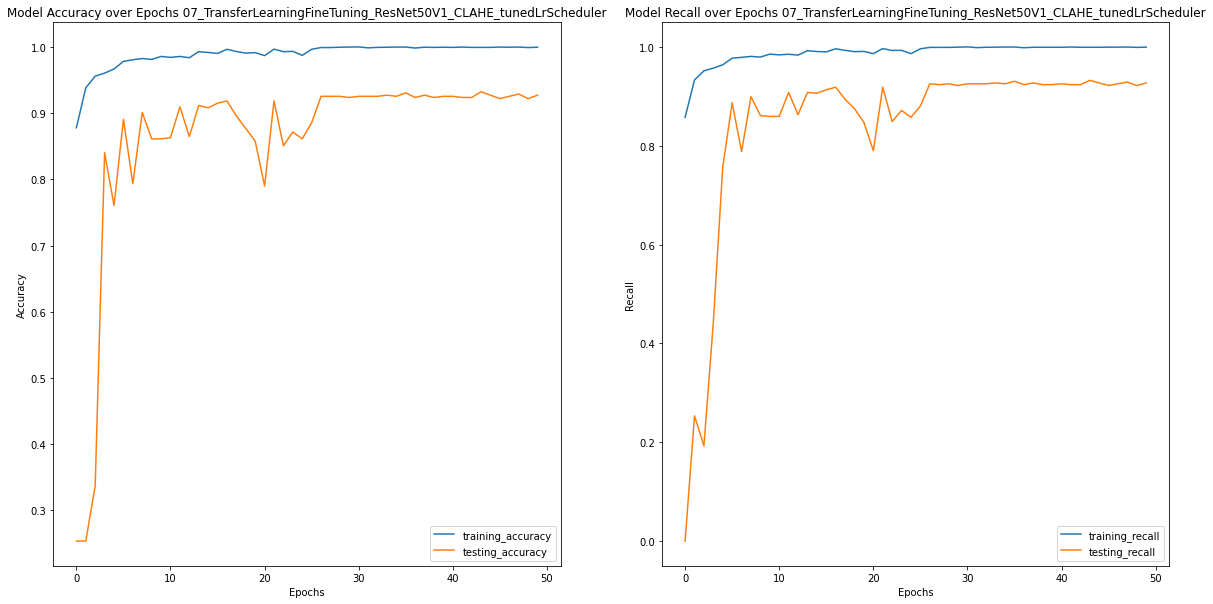

In [27]:
# Save results, save and plot training history
saveResults_csv(df_results,"TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler/results/classificationReport/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler.csv")
historyPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler/history/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler.npy"
save_history1(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler_history, historyPath)
history = load_history(historyPath)
plot_history(history, "07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler", location = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler/history/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedLrScheduler.jpg")



### 07_TransferLearningFineTuning_ResNet50V1_CLAHE: Transfer Learning with ResNet50V1 model on CLAHE Image (Optimizer - Adam + LrScheduler)

#### Dataset Loading

In [28]:
# Defining path of dataset
train_path = "/Dataset/Dataset_CLAHE/train"
test_path = "/Dataset/Dataset_CLAHE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [29]:
# Create Res Net 50 V1 and train
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.summary()
checkpointPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/checkpoint/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.ckpt"
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler_history = trainModelLrScheduler(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 batch_normalization_36 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_24 (Dense)            (None, 1000)              1001000   
                                                                 
 batch_normalization_37 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_25 (Dense)            (None, 20)                200

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 9s 12ms/step
Confusion Matrix:


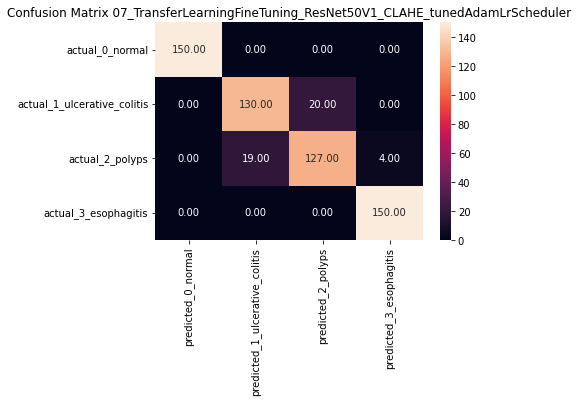

In [30]:
# Load best model from checkpoint folder and generate results. 
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/checkpoint/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler, test_data, "07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal_CLAHE",
                                                                              "1_ulcerative_colitis_CLAHE",
                                                                              "2_polyps_CLAHE",
                                                                              "3_esophagitis_CLAHE"],
                                                                location = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/results/confusionMatrix/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.jpg")

INFO:tensorflow:Assets written to: ram://24617280-8704-40dd-8878-770baaeab3ab/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


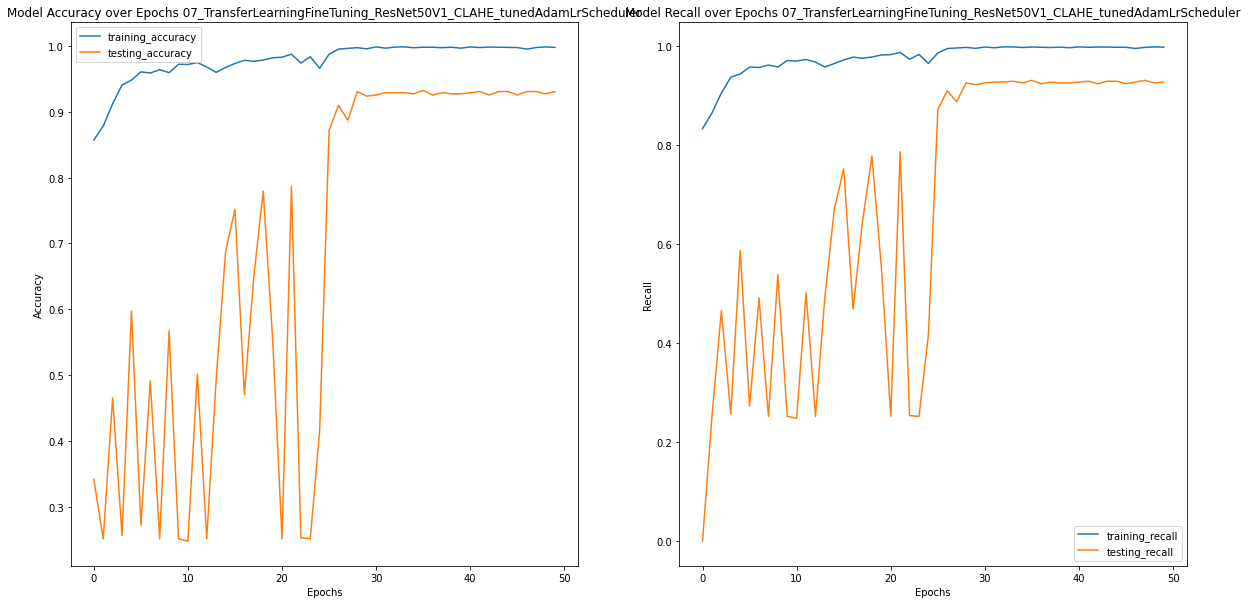

In [31]:
# Save results, save and plot training curve. 
saveResults_csv(df_results,"TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/results/classificationReport/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.csv")
historyPath = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/history/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.npy"
save_history1(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler_history, historyPath)
history = load_history(historyPath)
plot_history(history, "07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler", location = "TrainedResults/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/history/07_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.jpg")